In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Connect Four Game Implementation

This documentation covers the implementation of the Connect Four game using Python, with the help of `numpy` and `matplotlib` libraries.

## Class: `connectFour`

### Constructor: `__init__()`
Initializes the Connect Four board and sets the winner to 0.

- **Attributes:**
  - `self.board`: A 6x7 numpy array initialized to zeros, representing the game board.
  - `self.winner`: An integer initialized to 0, representing the winner of the game (0 if no winner yet).

### Method: `drop_piece(player_number, column)`
Drops a player's piece into the specified column.

- **Parameters:**
  - `player_number` (int): The player number (1 or 2).
  - `column` (int): The column where the player wants to drop the piece.

- **Returns:**
  - `row` (int): The row index where the piece was placed.
  - `valid` (bool): True if the piece was successfully dropped, False if the column is full.

- **Raises:**
  - `ValueError`: If the column is out of bounds.

### Method: `check_winner(row, column)`
Checks if the current move results in a win for the player.

- **Parameters:**
  - `row` (int): The row index of the last move.
  - `column` (int): The column index of the last move.

- **Returns:**
  - `bool`: True if the player has won, False otherwise.

### Method: `show_board()`
Displays the current state of the game board using `matplotlib`.

- **Visualization:**
  - The board cells are color-coded (white for empty, red for Player 1, yellow for Player 2).
  - Each cell displays the player number.
  - Grid lines are added for better visual separation of cells.

### Method: `play(player_number, column)`
Handles a player's move by dropping a piece, checking for a winner, and displaying the updated board.

- **Parameters:**
  - `player_number` (int): The player number (1 or 2).
  - `column` (int): The column where the player wants to drop the piece.

- **Raises:**
  - `ValueError`: If the player number is not 1 or 2.
  - `ValueError`: If the column is full and the piece cannot be dropped.



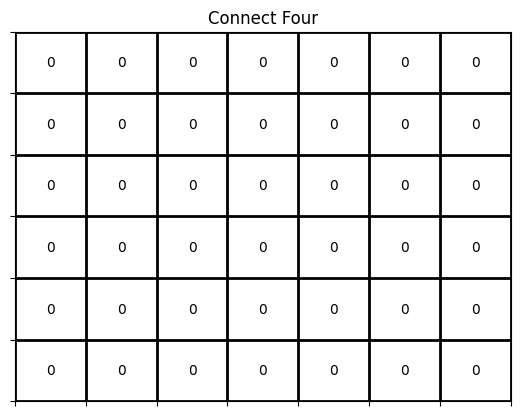

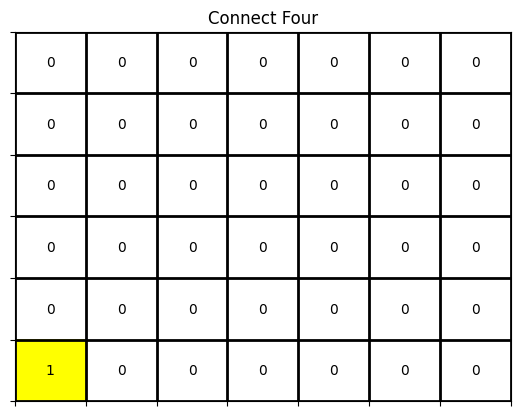

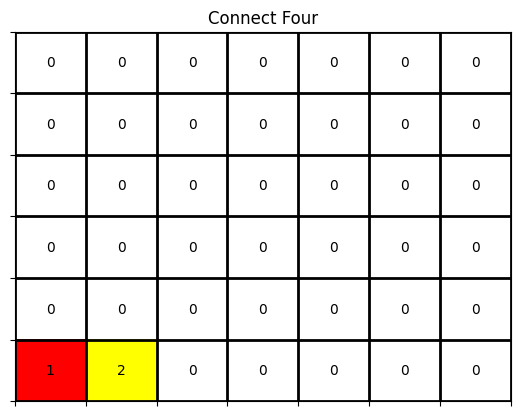

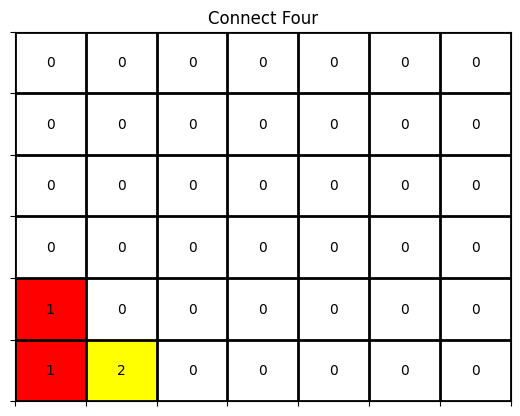

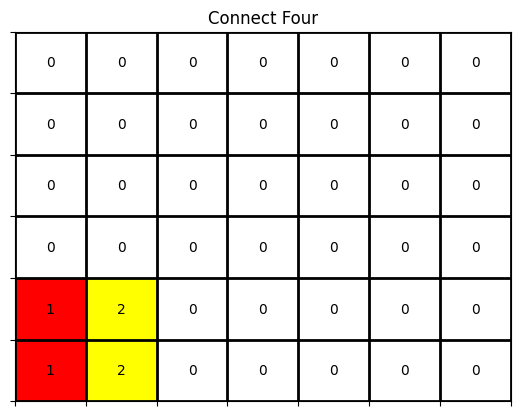

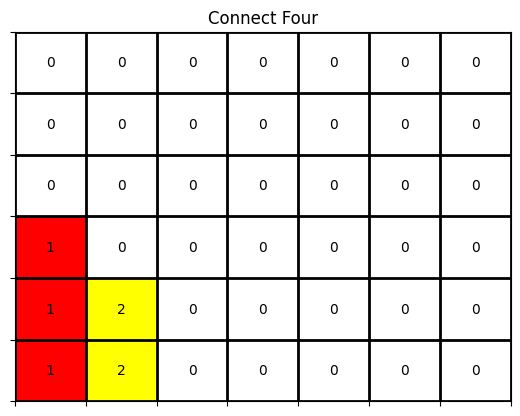

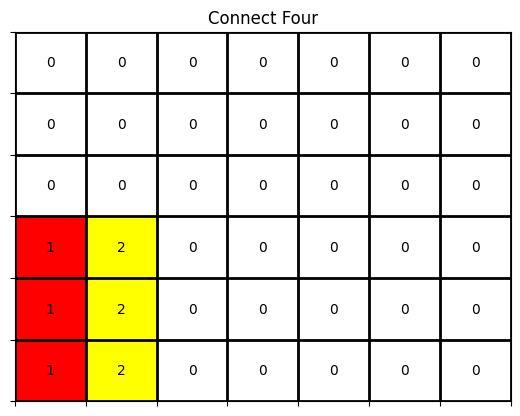

Player 1 wins!


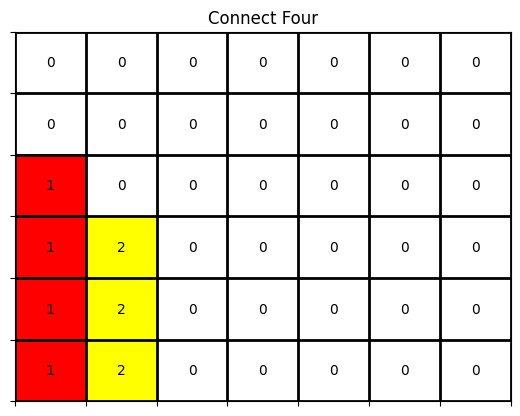

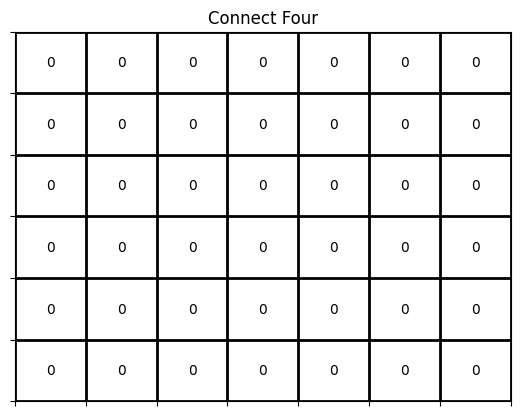

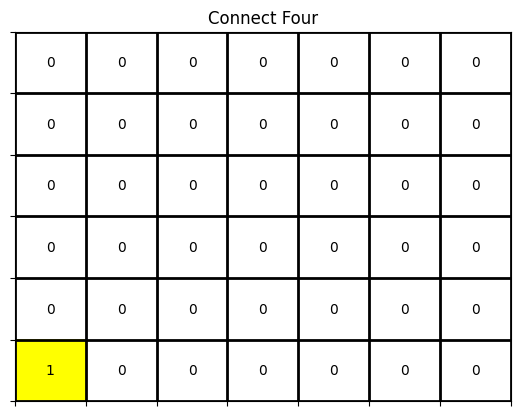

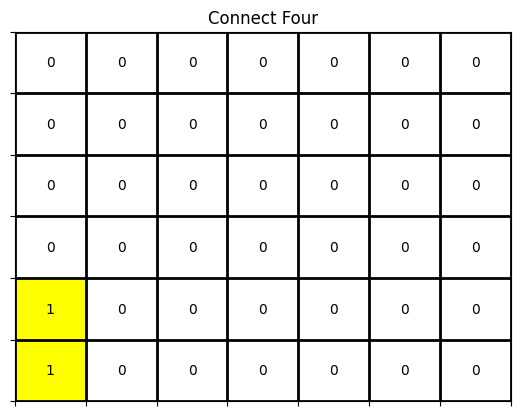

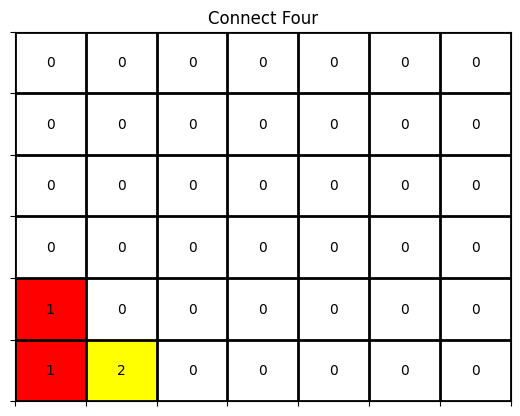

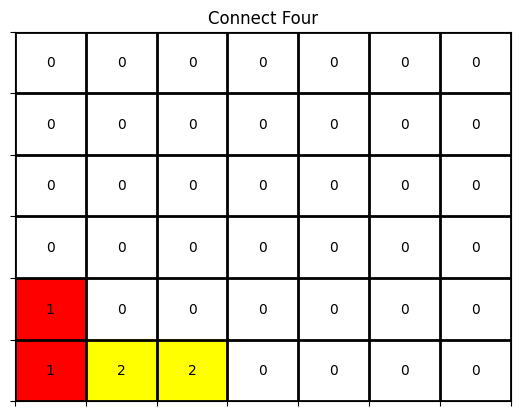

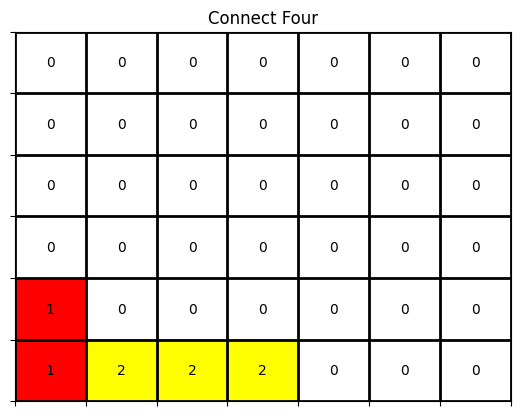

Player 2 wins!


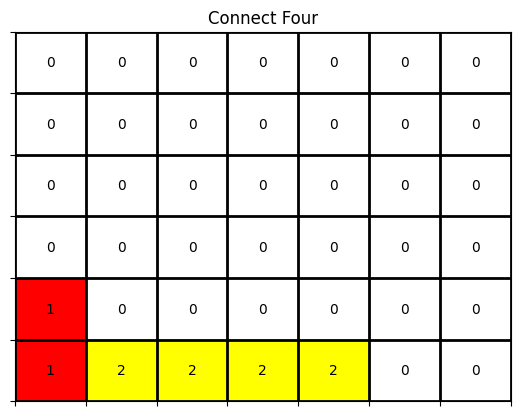

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class connectFour:
    def __init__(self):
        self.board = np.zeros((6, 7), dtype=int)
        self.winner = 0
    
    def drop_piece(self, player_number, column):
        if column < 0 or column >= self.board.shape[1]:
            raise ValueError("Column out of bounds")
        
        for row in range(self.board.shape[0] - 1, -1, -1):
            if self.board[row, column] == 0:
                self.board[row, column] = player_number
                return row, True
        return -1, False
    
    def check_winner(self, row, column):
        player = self.board[row, column]
        if player == 0:
            return False
        
        def count_pieces(delta_row, delta_col):
            count = 0
            r, c = row, column
            while 0 <= r < self.board.shape[0] and 0 <= c < self.board.shape[1] and self.board[r, c] == player:
                count += 1
                r += delta_row
                c += delta_col
            return count
        
        # Check vertical and horizontal directions
        directions = [(1, 0), (0, 1)]
        for dr, dc in directions:
            if count_pieces(dr, dc) + count_pieces(-dr, -dc) - 1 >= 4:
                self.winner = player
                return True
        return False
    
    def show_board(self):
        fig, ax = plt.subplots()
        ax.imshow(self.board, cmap=mcolors.ListedColormap(['white', 'red', 'yellow']), aspect='auto')

        # Add grid and text
        for i in range(self.board.shape[0]):
            for j in range(self.board.shape[1]):
                text = ax.text(j, i, int(self.board[i, j]),
                               ha="center", va="center", color="black")

        plt.title("Connect Four")
        plt.grid(True, which='both', color='black', linestyle='-', linewidth=2)
        plt.xticks(np.arange(-0.5, 7, 1), [])
        plt.yticks(np.arange(-0.5, 6, 1), [])
        plt.show()
    
    def play(self, player_number, column):
        if player_number not in [1, 2]:
            raise ValueError("Player number must be 1 or 2")
        row, valid = self.drop_piece(player_number, column)
        if not valid:
            raise ValueError("Column is full")
        if self.check_winner(row, column):
            print(f"Player {player_number} wins!")
        self.show_board()

# Testing the implementation
game = connectFour()
game.show_board()

# Scenario 1: Player 1 wins with a vertical line
moves_vertical = [(1, 0), (2, 1), (1, 0), (2, 1), (1, 0), (2, 1), (1, 0)]
for player, col in moves_vertical:
    game.play(player, col)

# Reset the game for the second scenario
game = connectFour()
game.show_board()

# Scenario 2: Player 2 wins with a horizontal line
moves_horizontal = [(1, 0), (1, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
for player, col in moves_horizontal:
    game.play(player, col)
